**Run the cell below before doing anything else!**

In [ ]:
!pip3 install coolprop

# Open Systems and Concentrated Solar Power

Peter Godart ([ptgodart@mit.edu](mailto:ptgodart@gmail.com))


To successfully mitigate the climate crisis, the consumption of greenhouse gas-emitting fossil fuels must be greatly reduced. Fortuntely, in its place, we have ample solar energy at our disposal to meet the world's power needs. While photovoltaic (PV) solar panels are continually getting cheaper and more efficient, questions remain as to their scalability to meet our global energy consumption. One interesting alternative method for converting solar energy to electricity is to use the Sun's radiation to supply thermal energy to power a thermodynamic cycle that generates mechanical work. This technology, called "Concentrated Solar Power" (CSP), utilizes an array of mirrors to direct sunlight onto a collector atop a central tower, through which a heat transfer fluid flows, as is depicted in this image of a CSP plant in Dubai:

<img src="https://helioscsp.com/wp-content/uploads/2019/04/Dubai-concentrated-solar-power.jpg" height=400px></img>

The heat transfer fluid, which is typically a molten nitrate salt, absorbs this thermal energy and transfers it to a separate closed-loop thermodynamic cycle - in this case, a Stirling Cycle that uses air as the working fluid. The entire system is modeled as follows:

<img src="https://i.imgur.com/dHkh9TD.png" width=800px></img>

In this exercise, we will analyze this approach to converting solar energy to electricity and compare it to PV, as well as fossil fuels in several ways. We will focus in on the two subsystems separately to make the analysis easier.

### Stirling Cycle Subsystem

We will start by analyzing the Stirling Cycle subsystem which takes in thermal energy, $\dot{Q}_{in}$, and produces some net mechanical work $\dot{W}_{net}$. The cycle can be depicted graphically as:

<img src="https://i.imgur.com/mHG6vXp.png" width=350px></img>

In this cycle, the working fluid undergoes the following processes:

*   $1\rightarrow2$: Isothermal compression at $T_L$
*   $2\rightarrow3$: Isochoric heating to $T_H$
*   $3\rightarrow4$: Isothermal expansion at $T_H$
*   $4\rightarrow1$: Isochoric cooling to $T_L$

These states plotted on a P-V and T-S diagram looks like the following:

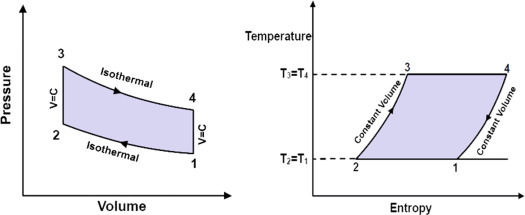

and in operation looks something like:

<img src="https://i.imgur.com/FHBPlle.gif" width=250px></img>

## Problem 1:

For the purposes of our CSP example, we are interested in computing the efficiency of the cycle, $\eta = \dot{W_{net}}/\dot{Q}_{in}$, to determine what area of solar field is required. What is $\eta$ under the following cycle conditions?

  1. $T_H = 600$ degC
  2. $T_L = T_a = 20$ degC
  3. $P_1=P_a = 101325$ Pa
  4. $P_2 = 200000$ Pa

*Run the following code block to compute $\eta$:*

State 1:
--------
T_1=293.1 K
P_1=1.013e+05 Pa
V_1=0.8302 m^3
s_1=3863 J/kg-K

State 2:
--------
T_2=293.1 K
P_2=2e+05 Pa
V_2=0.4204 m^3
s_2=3668 J/kg-K

State 3:
--------
T_3=873.1 K
P_3=5.973e+05 Pa
V_3=0.4204 m^3
s_3=4491 J/kg-K

State 4:
--------
T_4=873.1 K
P_4=3.022e+05 Pa
V_4=0.8302 m^3
s_4=4687 J/kg-K



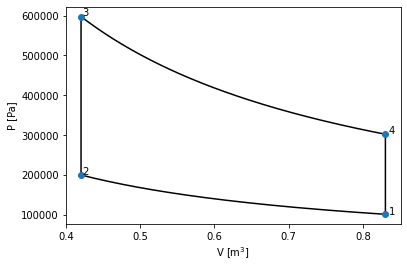

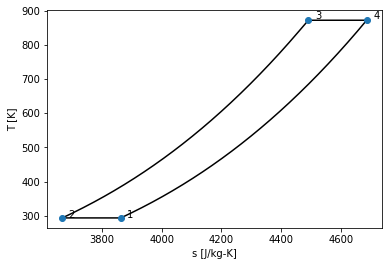

w_net=1.137e+05 J/kg
q_in=6.143e+05 J/kg
eta_stirling=0.185
eta_carnot=0.664


In [ ]:
import CoolProp as cp
from CoolProp.CoolProp import AbstractState
from matplotlib import pyplot as plt
import numpy as np

# Given:
m_air = 1 # kg
T_H = 600+273.15 # K
T_L = 20+273.15 # K
P_1 = 101325 # Pa
P_2 = 200000 # Pa

# Get an instance of the Air object:
Air = AbstractState('HEOS', 'Air')

P_cycle = []
V_cycle = []
T_cycle = []
s_cycle = []

# Update thermodynamic state of air like so:
# State 1:
T_1 = T_L
Air.update(cp.PT_INPUTS, P_1, T_1)
num_points = 250
# Compute other state variables like so:
V_1 = m_air / Air.rhomass() # m^3
s_1 = Air.smass() # J/kg-K
u_1 = Air.umass() # J/kg
for P in np.linspace(P_1, P_2, num_points):
  Air.update(cp.PT_INPUTS, P, T_1)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 1:\n\
--------\n\
T_1={T_1:.4g} K\n\
P_1={P_1:.4g} Pa\n\
V_1={V_1:.4g} m^3\n\
s_1={s_1:.4g} J/kg-K\n')

# Compute the properties for the other states and W_net:
T_2 = T_L
Air.update(cp.PT_INPUTS, P_2, T_2)
V_2 = m_air / Air.rhomass() # m^3
s_2 = Air.smass() # J/kg-K
u_2 = Air.umass() # J/kg
for T in np.linspace(T_2, T_H, num_points):
  Air.update(cp.DmassT_INPUTS, m_air/V_2, T)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 2:\n\
--------\n\
T_2={T_2:.4g} K\n\
P_2={P_2:.4g} Pa\n\
V_2={V_2:.4g} m^3\n\
s_2={s_2:.4g} J/kg-K\n')

T_3 = T_H
Air.update(cp.DmassT_INPUTS, m_air/V_2, T_3)
V_3 = m_air / Air.rhomass() # m^3
s_3 = Air.smass() # J/kg-K
P_3 = Air.p() # Pa
u_3 = Air.umass() # J/kg
Air.update(cp.DmassT_INPUTS, m_air/V_1, T_3)
P_4 = Air.p()
for P in np.linspace(P_3, P_4, num_points):
  Air.update(cp.PT_INPUTS, P, T_3)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 3:\n\
--------\n\
T_3={T_3:.4g} K\n\
P_3={P_3:.4g} Pa\n\
V_3={V_3:.4g} m^3\n\
s_3={s_3:.4g} J/kg-K\n')

T_4 = T_H
Air.update(cp.DmassT_INPUTS, m_air/V_1, T_4)
V_4 = m_air / Air.rhomass() # m^3
s_4 = Air.smass() # J/kg-K
P_4 = Air.p() # Pa
u_4 = Air.umass() # J/kg
for T in np.linspace(T_4, T_1, num_points):
  Air.update(cp.DmassT_INPUTS, m_air/V_1, T)
  P_cycle.append(Air.p())
  V_cycle.append(m_air/Air.rhomass())
  T_cycle.append(Air.T())
  s_cycle.append(Air.smass())
# Print state variables:
print(f'\
State 4:\n\
--------\n\
T_4={T_4:.4g} K\n\
P_4={P_4:.4g} Pa\n\
V_4={V_4:.4g} m^3\n\
s_4={s_4:.4g} J/kg-K\n')

# PV diagram points:
plt.plot(V_cycle, P_cycle, '-', color='black')
V_vec = [V_1, V_2, V_3, V_4]
P_vec = [P_1, P_2, P_3, P_4]
plt.plot(V_vec, P_vec, 'o')
i = 0
for V, P in zip(V_vec, P_vec):
  i += 1
  plt.annotate(f'{i}', (V*1.005, P*1.005))
plt.xlabel('V [m$^3$]')
plt.ylabel('P [Pa]')
plt.show()

# TS diagram points:
plt.plot(s_cycle, T_cycle, '-', color='black')
T_vec = [T_1, T_2, T_3, T_4]
s_vec = [s_1, s_2, s_3, s_4]
plt.plot(s_vec, T_vec, 'o')
i = 0
for s, T in zip(s_vec, T_vec):
  i += 1
  plt.annotate(f'{i}', (s*1.005, T*1.005))
plt.xlabel('s [J/kg-K]')
plt.ylabel('T [K]')
plt.show()

# First and second law!: (du = dq - dw and ds = dq/T)
# 1->2: Isothermal compression (w_12 = q_12 - u_12 and q_12 = T_L*(s_2 - s_1))
q_12 = T_L * (s_2 - s_1)
w_12 = q_12 - (u_2 - u_1)
# 2->3: Isochoric heating (w_23 = 0, q_23 = u_3 - u_2)
w_23 = 0
q_23 = u_3 - u_2
# 3->4: Isothermal expansion (w_34 = q_34 - u_34 and q_34 = T_H*(s_4 - s_3))
q_34 = T_H * (s_4 - s_3)
w_34 = q_34
# 4->1: Isochoric cooling (w_41 = 0 and q_41 = u_1 - u_4)
w_41 = 0
q_41 = u_1 - u_4

# Compute net work
w_net = w_12 + w_23 + w_34 + w_41
print(f'w_net={w_net:.4g} J/kg')

# Compute net heat in
q_in = q_23 + q_34
print(f'q_in={q_in:.4g} J/kg')

# Compute efficiency
eta_stirling = w_net / q_in
eta_carnot = 1 - T_L/T_H
print(f'eta_stirling={eta_stirling:.3g}')
print(f'eta_carnot={eta_carnot:.3g}')

Note, this efficiency is quite low, largely due to the fact that a significant amount of thermal energy is purposely dissipated to the ambient environment between States 4 and 1. Instead, this thermal energy can be used to heat up or "regenerate" the air between States 2 and 3. In this case, our efficiency increases. Let's assume we can recover 50\% of this heat.

*Run the following cell to compute the Stirling Cycle efficiency using regeneration*:

In [ ]:
q_in_regen = q_23 + q_34 + 0.5*q_41 # Assume we can perfectly recover the heat from the isochoric cooling (q_41 = -q_23)
eta_stirling_regen = w_net / q_in_regen
print(f'eta_stirling_regen={eta_stirling_regen:.3g}')

eta_stirling_regen=0.29


## Problem 2:

Given the value for $\eta$ computed in Problem 1 for the regenerative Stirling Cycle, what is the total heliostat area required for the target power output of 10 MW at peak solar irradiance (i.e. 1000 W/m^2)? Assume 100\% electricity conversion efficiency.

In [ ]:
P_output = 10e6 # W
q_dot_solar = 1000 # W/m^2
Q_dot_solar = P_output / eta_stirling_regen
A_solar_field = Q_dot_solar / q_dot_solar
print(f'At eta_stirling_regen={eta_stirling_regen:.3g}, need {Q_dot_solar*1e-6:.3g} MW of thermal energy.')
print(f'Requires {A_solar_field*1e-6:0.2g} km^2 of heliostats.')

At eta_stirling_regen=0.29, need 34.5 MW of thermal energy.
Requires 0.035 km^2 of heliostats.


## Solar Collection Subsystem

With a sense for how much solar area is required for achieving the desired power output, we can now compute the flow rates necessary for the molten salt heat transfer fluid. We can model this subsystem as follows:

<img src="https://i.imgur.com/UhaCfEP.png" width=600px></img>



## Problem 3:

What is the flow rate of molten nitrate salt required to achieve a target output temperature of 600 degC at peak solar irradiance? Assume the following:

 1. Ambient temperature, $T_a=$ 300 K
 2. $T_L = 300$ degC
 3. $h_{conv} = 25$ W/m^2-K
 4. $h_{rad} = 50$ W/m^2-K

 *Run the following code block:*

In [ ]:
MoltenSalt = AbstractState('INCOMP', 'NaK')
MoltenSalt.update(cp.PT_INPUTS, 101325, 600)
P_a = 101325 # Pa
T_a = 300 + 273.15 # K
T_in = T_a
h_conv = 25 # W/m^2-K
h_rad = 50 # W/m^2-K
A_collector = 30 # m^2
sigma = 5.67e-8 # W/m^2-K^4
MoltenSalt.update(cp.PT_INPUTS, P_a, T_a)
h_in = MoltenSalt.hmass()
# First Law: d/dt(E_cv) = 0 = d/dt(Q_in) - d/dt(Q_out) - d/dt(W_shaft_net) + m_dot*(h_in - h_out)
T_out = 600 + 273.15 # K
MoltenSalt.update(cp.PT_INPUTS, P_a, T_out)
h_out = MoltenSalt.hmass()
m_dot = -(Q_dot_solar - A_collector*(h_conv + h_rad)*(T_out - T_a)) / (h_in - h_out)
print(f'A flow rate of {m_dot:.3g} kg/s is required.')

A flow rate of 74.2 kg/s is required.


## Problem 4:

How much CO$_2$ is offset per year by running CSP compared to methane (CH$_4$) combustion? Assume CH$_4$ combustion has a carbon intensity of 60 g CO$_2$/MJ thermal and that the plant generates power 50\% of the time (0.5 capacity factor). *hint: use the efficiency you compute for the regenerative Stirling Cycle above assuming same conditions otherwise.*


In [ ]:
I_CH4 = 60e-3/1e6 # kg/J
capacity_factor = 0.5
seconds_per_year = 31556926 # s
E_total = P_output * capacity_factor * seconds_per_year # J
m_co2_emissions = I_CH4 * E_total # kg

print(f'Total CO2 avoided each year: {m_co2_emissions*1e-6:.3g} kt CO2')

Total CO2 avoided each year: 9.47 kt CO2


## Problem 5:

How does the area required for this solar field compare to that required of a conventional PV solar field? Assuming the solar panels have an efficiency of 20\% and the same peak solar irradiance. Briefly comment on the advantages and drawbacks of CSP over PV.

In [ ]:
eta_pv = 0.2
A_pv = P_output / q_dot_solar / eta_pv
print(f'{A_pv*1e-6:0.2g} km^2 PV panels is required ({A_pv/A_solar_field:0.3g}x greater than CSP)')

0.05 km^2 PV panels is required (1.45x greater than CSP)
